In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import plotly.graph_objects as go
import re
from scipy.stats import chi2_contingency
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")
from scipy.stats import shapiro
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split

#Silahkan Tambahkan Package lainnya jika dibutuhkan

# **Membaca Dataset Loan Predictor Based On Customer Behavior**


In [2]:
url = 'https://drive.google.com/uc?id=1oimUYwdquJf5nPo852x094ZE7EKZ6LcD'

In [3]:
df = pd.read_csv(url)

In [4]:
df.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


# **Descriptive Statistik Analysis**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 252000 non-null  int64 
 1   Income             252000 non-null  int64 
 2   Age                252000 non-null  int64 
 3   Experience         252000 non-null  int64 
 4   Married/Single     252000 non-null  object
 5   House_Ownership    252000 non-null  object
 6   Car_Ownership      252000 non-null  object
 7   Profession         252000 non-null  object
 8   CITY               252000 non-null  object
 9   STATE              252000 non-null  object
 10  CURRENT_JOB_YRS    252000 non-null  int64 
 11  CURRENT_HOUSE_YRS  252000 non-null  int64 
 12  Risk_Flag          252000 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 25.0+ MB


Dari informasi di atas, dapat diketahui bahwa nama kolom dengan tipe datanya sudah sesuai.

In [6]:
# Mengetahui jumlah kolom dan baris
jumlah_baris, jumlah_kolom = df.shape

# Menampilkan hasil
print("Jumlah Baris:", jumlah_baris)
print("Jumlah Kolom:", jumlah_kolom)

Jumlah Baris: 252000
Jumlah Kolom: 13


Dari informasi di atas, dapat diketahui bahwa pada dataset ini nama kolom beserta tipe datanya sudah sesuai. Dengan jumlah baris sebanyak 252.000 dan jumlah kolom sebanyak 13.

In [7]:
df.isnull().sum()

Id                   0
Income               0
Age                  0
Experience           0
Married/Single       0
House_Ownership      0
Car_Ownership        0
Profession           0
CITY                 0
STATE                0
CURRENT_JOB_YRS      0
CURRENT_HOUSE_YRS    0
Risk_Flag            0
dtype: int64

Dari informasi di atas, diketahui bahwa tidak ada nilai kosong pada masing-masing kolom.

In [8]:
df.duplicated().sum()

0

Dari informasi di atas, diketahui bahwa tidak ada nilai duplikat pada masing-masing kolom.

In [9]:
# Mengganti Id menjadi index
df.set_index('Id', inplace=True)
df.head()

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
Id,,,,,,,,,,,,
1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [10]:
# Mengganti nama kolom
df.rename(columns={'Income': 'income', 'Age': 'age', 'Experience': 'experience', 'Married/Single': 'marital_status', 'House_Ownership': 'house_ownership', 'Car_Ownership': 'car_ownership', 'Profession': 'profession', 'CITY': 'city', 'STATE': 'state', 'CURRENT_JOB_YRS': 'current_job_yrs', 'CURRENT_HOUSE_YRS': 'current_house_yrs', 'Risk_Flag': 'risk_flag'}, inplace=True)

# Menampilkan DataFrame setelah perubahan
print("\nDataFrame Setelah Perubahan Nama Kolom:")
df.info()


DataFrame Setelah Perubahan Nama Kolom:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 252000 entries, 1 to 252000
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   income             252000 non-null  int64 
 1   age                252000 non-null  int64 
 2   experience         252000 non-null  int64 
 3   marital_status     252000 non-null  object
 4   house_ownership    252000 non-null  object
 5   car_ownership      252000 non-null  object
 6   profession         252000 non-null  object
 7   city               252000 non-null  object
 8   state              252000 non-null  object
 9   current_job_yrs    252000 non-null  int64 
 10  current_house_yrs  252000 non-null  int64 
 11  risk_flag          252000 non-null  int64 
dtypes: int64(6), object(6)
memory usage: 25.0+ MB


Nama kolom sudah seragam.

In [11]:
df['risk_flag'] = df['risk_flag'].astype(str)

In [12]:
kontinu = ['income', 'age', 'experience', 'current_job_yrs', 'current_house_yrs']
diskrit = ['marital_status', 'house_ownership', 'car_ownership', 'profession', 'city', 'state', 'risk_flag']

# melihat deskripsi kolom kategorikal & nilai unique
df.select_dtypes(include='object').nunique()

marital_status       2
house_ownership      3
car_ownership        2
profession          51
city               317
state               29
risk_flag            2
dtype: int64

In [13]:
# cek nilai unique di kolom kategorikal
for col in df.select_dtypes(include=['object']).columns:
    print(f"{col}: {df[col].unique()}")

marital_status: ['single' 'married']
house_ownership: ['rented' 'norent_noown' 'owned']
car_ownership: ['no' 'yes']
profession: ['Mechanical_engineer' 'Software_Developer' 'Technical_writer'
 'Civil_servant' 'Librarian' 'Economist' 'Flight_attendant' 'Architect'
 'Designer' 'Physician' 'Financial_Analyst' 'Air_traffic_controller'
 'Politician' 'Police_officer' 'Artist' 'Surveyor' 'Design_Engineer'
 'Chemical_engineer' 'Hotel_Manager' 'Dentist' 'Comedian'
 'Biomedical_Engineer' 'Graphic_Designer' 'Computer_hardware_engineer'
 'Petroleum_Engineer' 'Secretary' 'Computer_operator'
 'Chartered_Accountant' 'Technician' 'Microbiologist' 'Fashion_Designer'
 'Aviator' 'Psychologist' 'Magistrate' 'Lawyer' 'Firefighter' 'Engineer'
 'Official' 'Analyst' 'Geologist' 'Drafter' 'Statistician' 'Web_designer'
 'Consultant' 'Chef' 'Army_officer' 'Surgeon' 'Scientist' 'Civil_engineer'
 'Industrial_Engineer' 'Technology_specialist']
city: ['Rewa' 'Parbhani' 'Alappuzha' 'Bhubaneswar' 'Tiruchirappalli[10]'


In [14]:
# Menghilangkan angka dan tanda kurung siku dari data di kolom "city"
df.city = df['city'].str.replace(r'\[\d+\]', '')
df.city = df.city.str.replace('_', ' ')

# Menampilkan DataFrame setelah perubahan
print(df.city)

Id
1                    Rewa
2                Parbhani
3               Alappuzha
4             Bhubaneswar
5         Tiruchirappalli
               ...       
251996            Kolkata
251997               Rewa
251998    Kalyan-Dombivli
251999        Pondicherry
252000              Avadi
Name: city, Length: 252000, dtype: object


In [15]:
# Menampilkan nilai unik dan frekuensinya pada kolom 'city' yang sudah diurutkan dari frekuensi terkecil
sorted_value_counts_city1 = df.city.value_counts().sort_index()
print("Nilai Unik dan Frekuensi yang Sudah Diurutkan pada Kolom 'city':")
print(sorted_value_counts_city1)

# Menampilkan jumlah nilai unik
jumlah_nilai_unik_city1 = df.city.nunique()
print("\nJumlah Nilai Unik pada Kolom 'city':", jumlah_nilai_unik_city1)

Nilai Unik dan Frekuensi yang Sudah Diurutkan pada Kolom 'city':
Adoni             953
Agartala          809
Agra             1012
Ahmedabad         649
Ahmednagar        645
                 ... 
Vijayanagaram    1259
Vijayawada       1172
Visakhapatnam     971
Warangal          459
Yamunanagar       659
Name: city, Length: 316, dtype: int64

Jumlah Nilai Unik pada Kolom 'city': 316


In [16]:
# Menghilangkan angka dan tanda kurung siku dari data di kolom "state"
df.state = df['state'].str.replace(r'\[\d+\]', '')
df.state = df.state.str.replace('_', ' ')

# Menampilkan DataFrame setelah perubahan
print(df.state)

Id
1         Madhya Pradesh
2            Maharashtra
3                 Kerala
4                 Odisha
5             Tamil Nadu
               ...      
251996       West Bengal
251997    Madhya Pradesh
251998       Maharashtra
251999        Puducherry
252000        Tamil Nadu
Name: state, Length: 252000, dtype: object


In [17]:
# Menampilkan nilai unik dan frekuensinya pada kolom 'state' yang sudah diurutkan dari frekuensi terkecil
sorted_value_counts_state1 = df.state.value_counts().sort_index()
print("Nilai Unik dan Frekuensi yang Sudah Diurutkan pada Kolom 'state':")
print(sorted_value_counts_state1)

# Menampilkan jumlah nilai unik
jumlah_nilai_unik_state1 = df.state.nunique()
print("\nJumlah Nilai Unik pada Kolom 'state':", jumlah_nilai_unik_state1)

Nilai Unik dan Frekuensi yang Sudah Diurutkan pada Kolom 'state':
Andhra Pradesh       25297
Assam                 7062
Bihar                19780
Chandigarh             656
Chhattisgarh          3834
Delhi                 5490
Gujarat              11408
Haryana               7890
Himachal Pradesh       833
Jammu and Kashmir     1780
Jharkhand             8965
Karnataka            11855
Kerala                5805
Madhya Pradesh       14122
Maharashtra          25562
Manipur                849
Mizoram                849
Odisha                4658
Puducherry            1433
Punjab                4720
Rajasthan             9174
Sikkim                 608
Tamil Nadu           16537
Telangana             7524
Tripura                809
Uttar Pradesh        29143
Uttarakhand           1874
West Bengal          23483
Name: state, dtype: int64

Jumlah Nilai Unik pada Kolom 'state': 28


In [18]:
# melihat data summary
df[kontinu].describe()

,income,age,experience,current_job_yrs,current_house_yrs
count,2.520000e+05,252000.000000,252000.000000,252000.000000,252000.000000
mean,4.997117e+06,49.954071,10.084437,6.333877,11.997794
std,2.878311e+06,17.063855,6.002590,3.647053,1.399037
min,1.031000e+04,21.000000,0.000000,0.000000,10.000000
25%,2.503015e+06,35.000000,5.000000,3.000000,11.000000
50%,5.000694e+06,50.000000,10.000000,6.000000,12.000000
75%,7.477502e+06,65.000000,15.000000,9.000000,13.000000
max,9.999938e+06,79.000000,20.000000,14.000000,14.000000


In [19]:
# melihat data summary
df[diskrit].describe()

,marital_status,house_ownership,car_ownership,profession,city,state,risk_flag
count,252000,252000,252000,252000,252000,252000,252000
unique,2,3,2,51,316,28,2
top,single,rented,no,Physician,Aurangabad,Uttar Pradesh,0
freq,226272,231898,176000,5957,1543,29143,221004


**Kesimpulan dari Descriptive Statistics**

1. Data terdiri dari 252000 baris dan 13 kolom serta tidak ada nilai null.
2. 5 kolom dengan variabel kontinu : income , age , experience , current_job_yrs , current_house_yrs.
3. 8 kolom dengan variabel diskrit : id , married_single,house_ownership, car_ownership , profession , city , state , risk_flag (target variabel).

# **Univariate Analysis**

## **A. Distribusi Histogram**

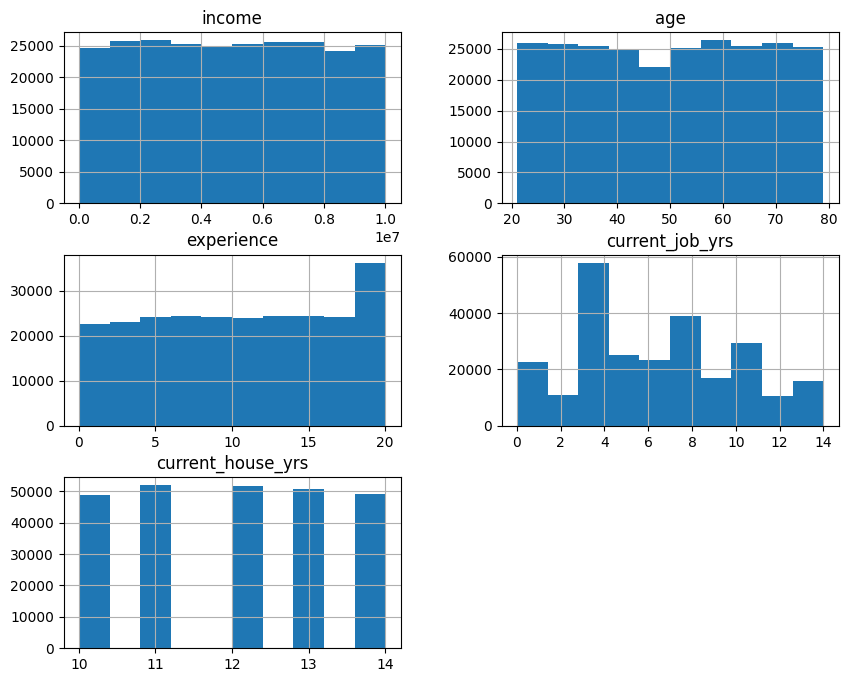

In [20]:
df.hist( figsize = (10, 8) )
plt.show()

## **B. Skewness**

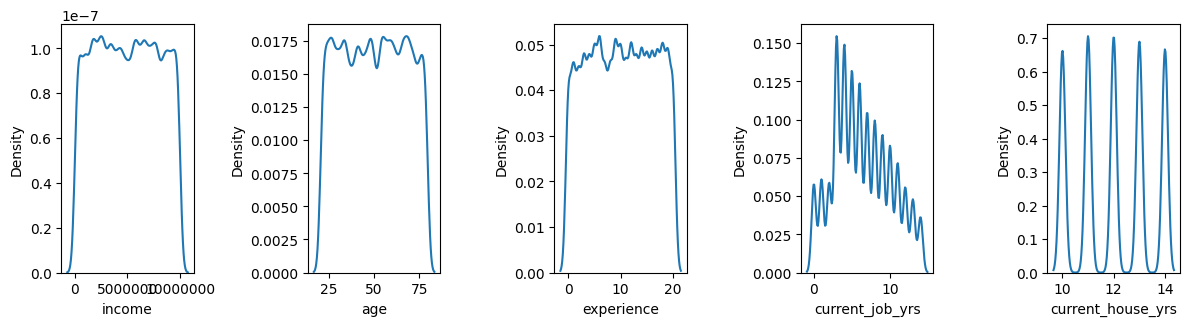

In [21]:
# Visualize skewness using seaborn
plt.figure(figsize=(12, 6))

for i in range(0, len(kontinu)):
    plt.subplot(2, len(kontinu), i+1)
    sns.kdeplot(df[kontinu[i]])
    plt.ticklabel_format(style='plain', axis='x')
    plt.tight_layout()
plt.show()


*   Multimodal : income, age, experience, current_house_yrs
*   Skew positif : current_job_yrs




## **C. Outlier**

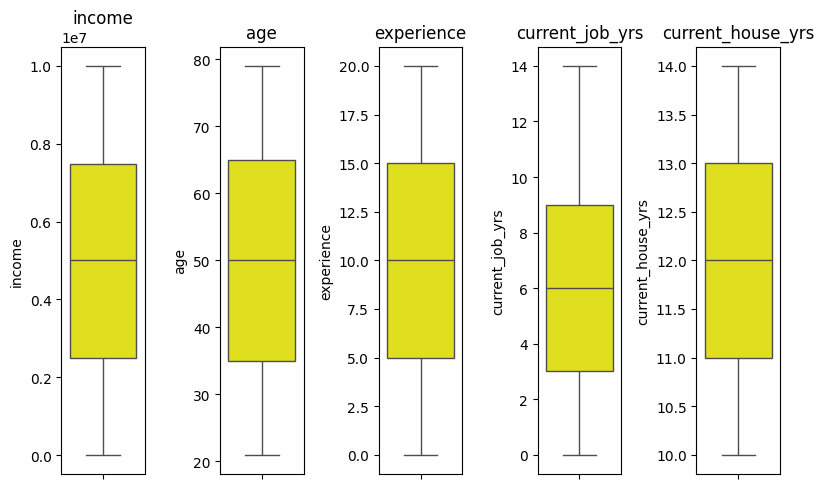

In [22]:
plt.figure(figsize=(8, 5))
for i, column in enumerate(kontinu, 1):
    plt.subplot(1, len(kontinu), i)
    sns.boxplot(y=df[column], color='yellow', orient='v')
    plt.title(f'{column}')

plt.tight_layout()
plt.show()

Dari informasi di atas, dapat diketahui bahwa pada dataset ini tidak ada outlier.

## **D. Distribusi Count per Kolom**

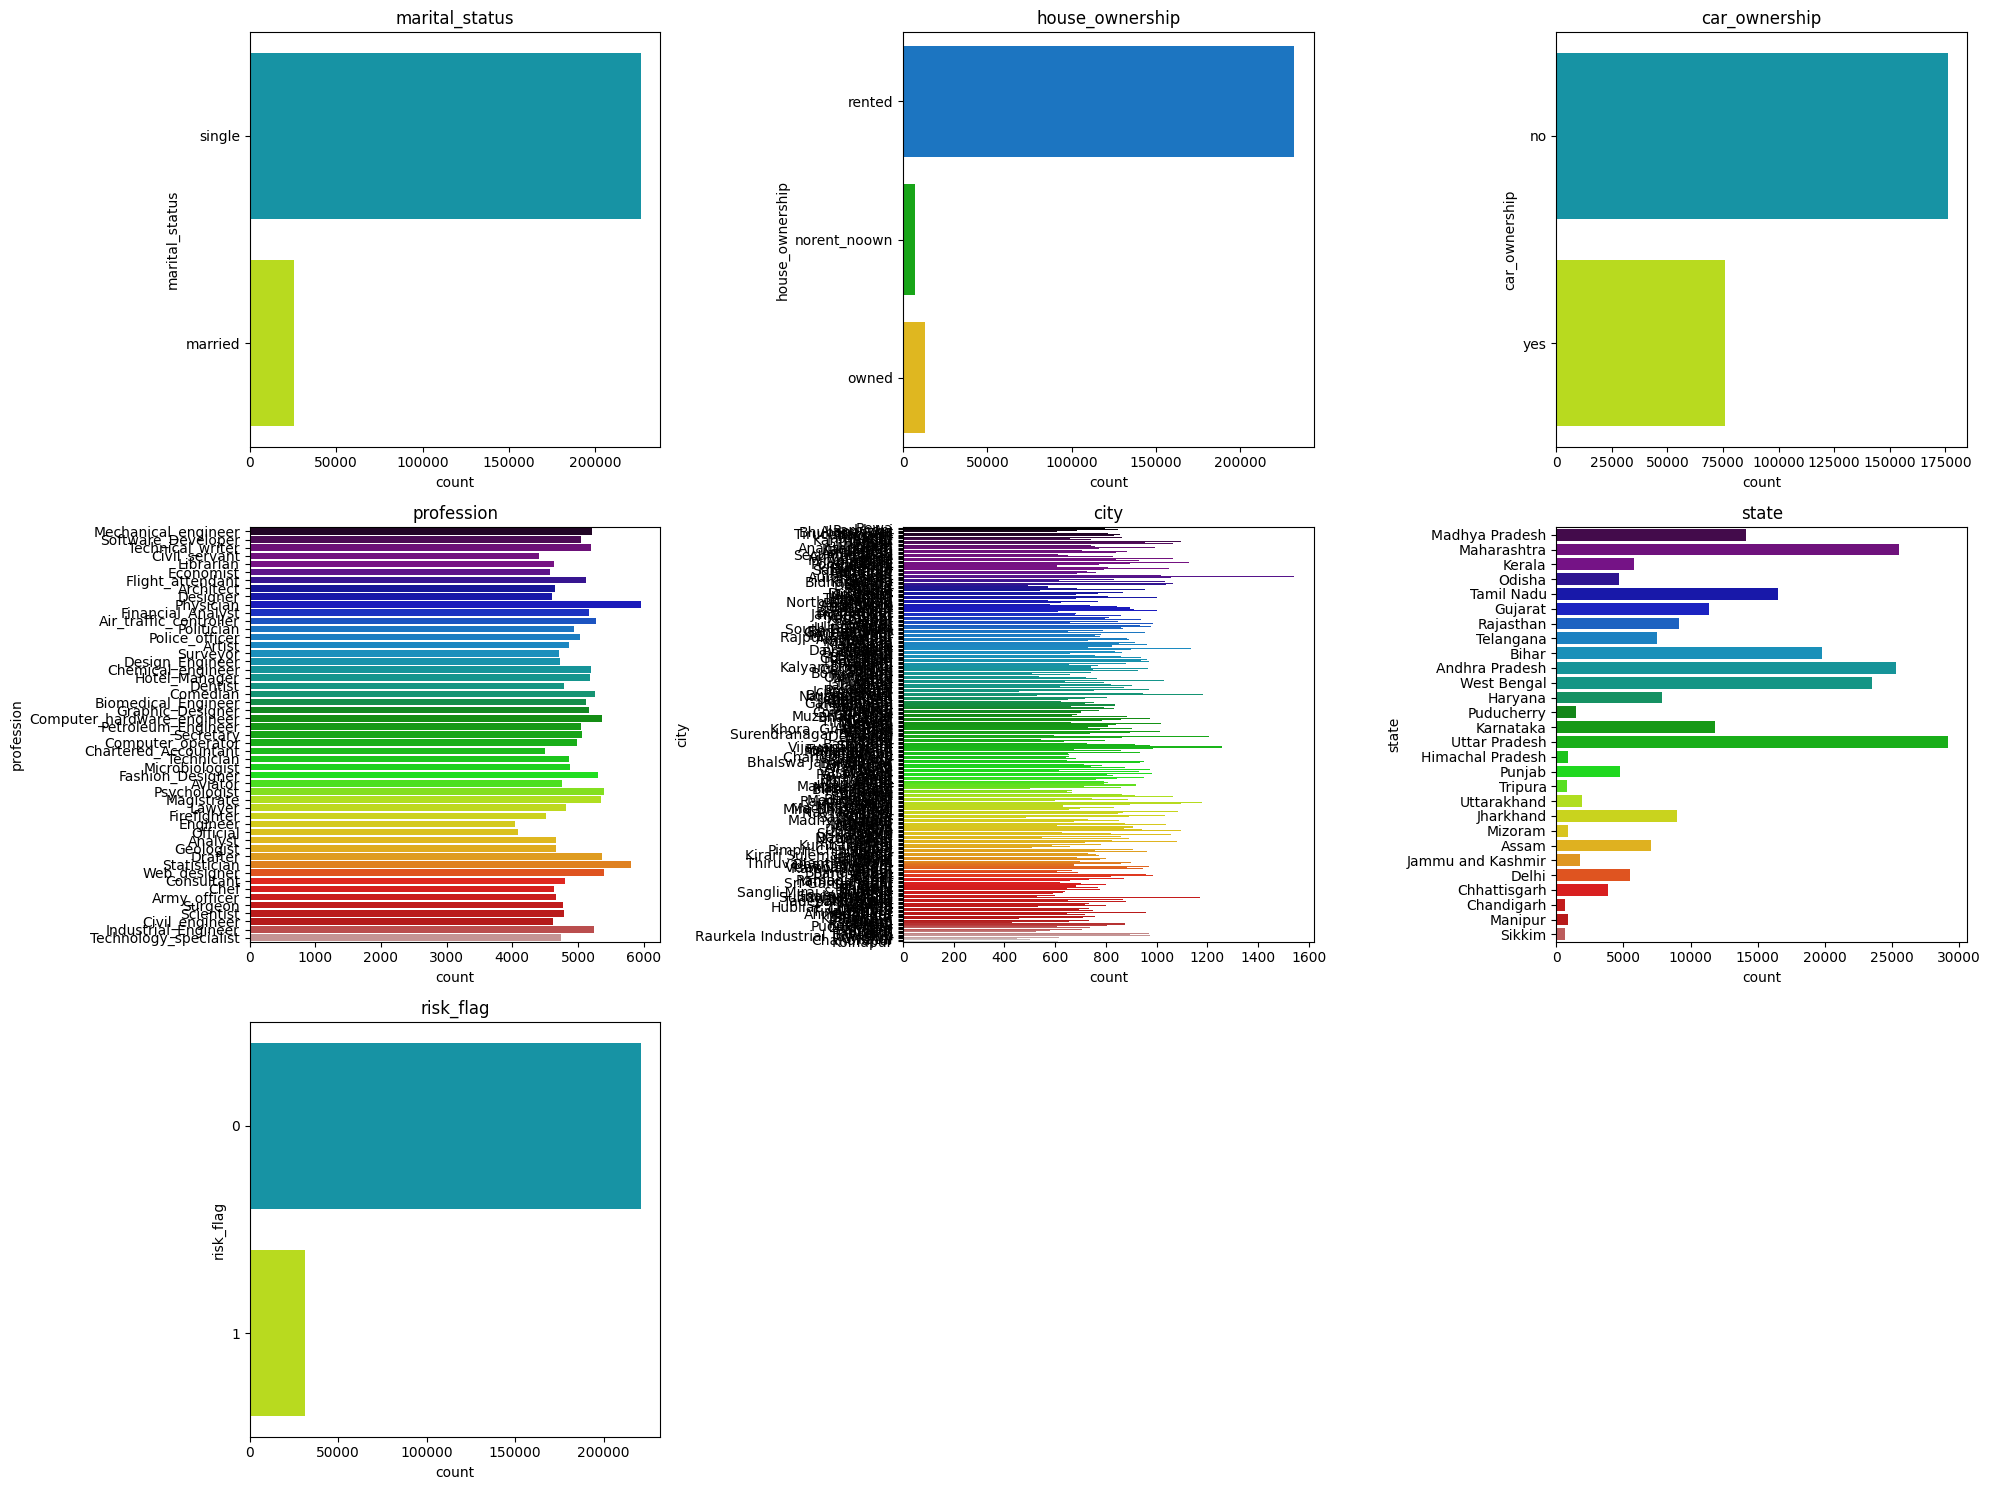

In [23]:
# Membuat satu subplot untuk setiap count plot
plt.figure(figsize=(20, 15))

for i, column in enumerate(diskrit, 1):
    plt.subplot(3, 3, i)
    sns.countplot(data=df, y=column, palette="nipy_spectral")
    plt.title(f'{column}')

plt.tight_layout()
plt.show()

**Kesimpulan dari Distribusi Data**

1. Kolom-kolom seperti city, state, dan profession memiliki data yang sangat banyak, sehingga diperlukan pengelompokan data untuk menggabungkan kategori serupa menjadi satu kategori baru. Tujuannya adalah untuk menyederhanakan data.
2. Ditemukan ketidakseimbangan dominasi kategori pada kolom marital_status, house_ownership, dan risk_flag yang dapat memengaruhi hasil analisis. Oleh karena itu, perlu dipertimbangkan apakah tindakan seperti oversampling atau undersampling diperlukan untuk menangani ketidakseimbangan tersebut.

# **Multivariate Analysis**

In [24]:
df['risk_flag'] = df['risk_flag'].astype(int)

### **A. Mencari Korelasi antar Fitur Numerical**

In [25]:
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
corr = corr.mask(mask)

fig = go.Figure()
fig.add_trace(go.Heatmap(z = corr, x = corr.columns.tolist(),y = corr.columns.tolist(),colorscale = 'RdBu',xgap = 1,ygap = 1,hoverinfo = "none")
)

fig.update_layout(
    {
        "title": {"text": "<b>Correlation in numerical feautures</b>","x": 0.5,"y": 0.9,"font": {"size": 15}
        },
        "xaxis": {"title": "Columns","tickfont": {"size": 8}
        },
        "yaxis": {"title": "Columns","tickfont": {"size": 8}
        },
        "template":'plotly_white',
        "yaxis_autorange" : "reversed"
    }
)
fig.show()

Terlihat dari korelasi heatmap diatas terlihat bahwa current_job_years dan experience mempunyai korelasi yang besar untuk itu kita akan memilih salah satu saja sebagai fitur dari target agar tidak terjadi Multikolinearitas.

### **B. Distribusi Data Numerical Terhadap risk flag**

In [26]:
df[kontinu].head()

,income,age,experience,current_job_yrs,current_house_yrs
Id,,,,,
1,1303834,23,3,3,13
2,7574516,40,10,9,13
3,3991815,66,4,4,10
4,6256451,41,2,2,12
5,5768871,47,11,3,14


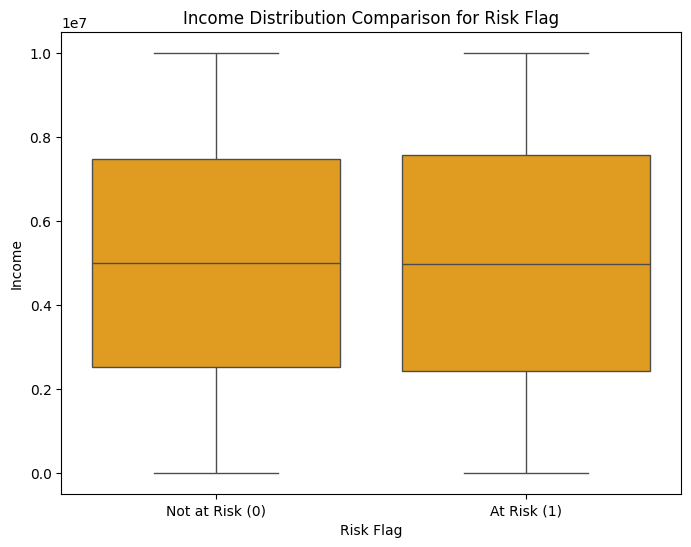

In [27]:
# Melihat distribusi data income berdasarkan risk flag

plt.figure(figsize=(8, 6))

# Membuat boxplot
sns.boxplot(data=df, x='risk_flag', y='income', color='orange')

plt.title('Income Distribution Comparison for Risk Flag')
plt.xlabel('Risk Flag')
plt.ylabel('Income')
plt.xticks([0, 1], ['Not at Risk (0)', 'At Risk (1)'])

plt.show()

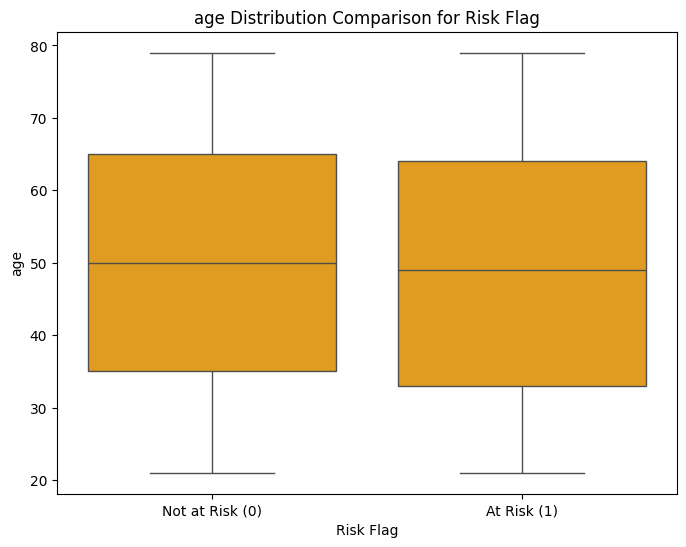

In [28]:
# Melihat distribusi data age berdasarkan risk flag

plt.figure(figsize=(8, 6))

# Membuat boxplot
sns.boxplot(data=df, x='risk_flag', y='age', color='orange')

plt.title('age Distribution Comparison for Risk Flag')
plt.xlabel('Risk Flag')
plt.ylabel('age')
plt.xticks([0, 1], ['Not at Risk (0)', 'At Risk (1)'])

plt.show()

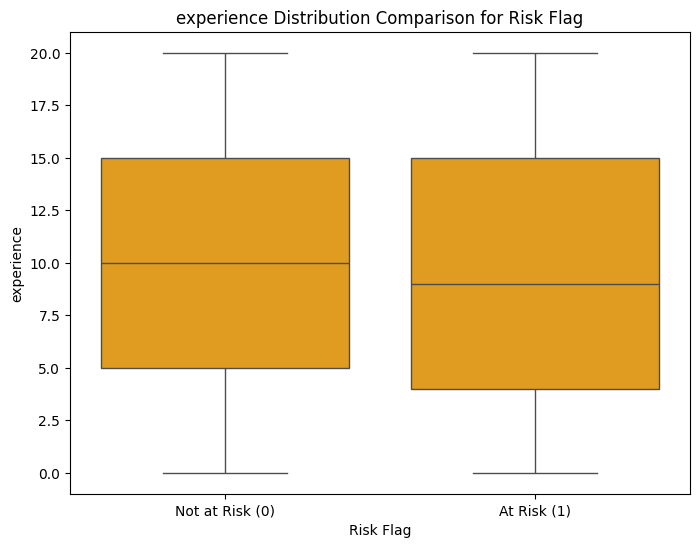

In [29]:
# Melihat distribusi data experience berdasarkan risk flag

plt.figure(figsize=(8, 6))

# Membuat boxplot
sns.boxplot(data=df, x='risk_flag', y='experience', color='orange')

plt.title('experience Distribution Comparison for Risk Flag')
plt.xlabel('Risk Flag')
plt.ylabel('experience')
plt.xticks([0, 1], ['Not at Risk (0)', 'At Risk (1)'])

plt.show()

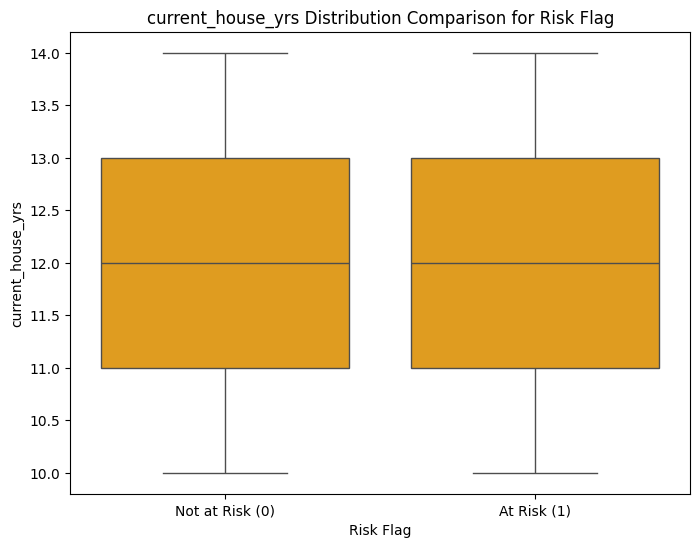

In [30]:

plt.figure(figsize=(8, 6))

# Membuat boxplot
sns.boxplot(data=df, x='risk_flag', y='current_house_yrs', color='orange')

plt.title('current_house_yrs Distribution Comparison for Risk Flag')
plt.xlabel('Risk Flag')
plt.ylabel('current_house_yrs')
plt.xticks([0, 1], ['Not at Risk (0)', 'At Risk (1)'])

plt.show()

In [31]:
cats = ['marital_status', 'house_ownership',
       'car_ownership', 'risk_flag']
df_categorikal = df[cats]
df_categorikal.head()

,marital_status,house_ownership,car_ownership,risk_flag
Id,,,,
1,single,rented,no,0
2,single,rented,no,0
3,married,rented,no,0
4,single,rented,yes,1
5,single,rented,no,1


### **C. Mencari Korelasi antar Fitur Kategorikal**

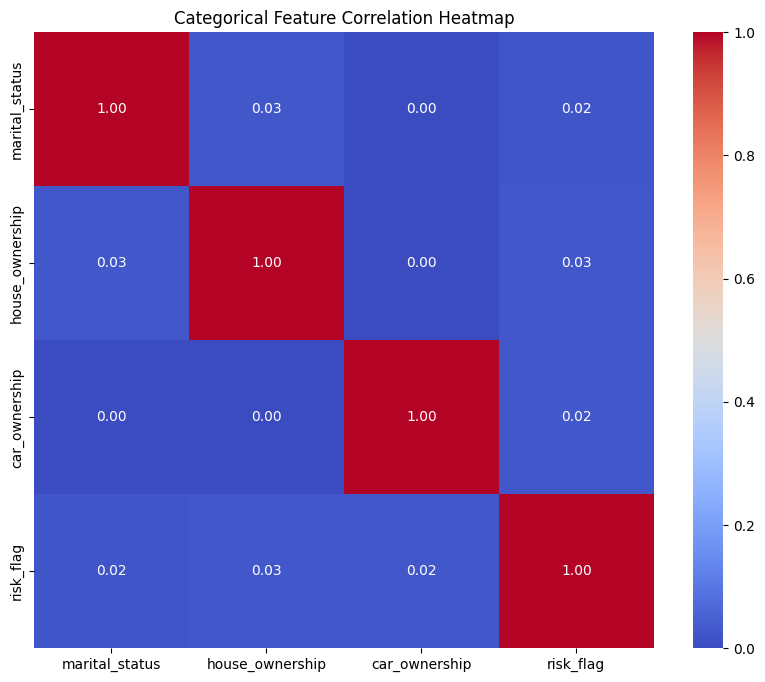

In [32]:
# Label encoding untuk mengubah kategori menjadi numerik
le = LabelEncoder()
df_encoded = df_categorikal.apply(le.fit_transform)

# Fungsi untuk menghitung korelasi Cramér's V
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2, _, _, _ = chi2_contingency(confusion_matrix)
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

# Hitung korelasi antar fitur kategorikal
corr_matrix = pd.DataFrame(index=cats, columns=cats)

for i in range(len(cats)):
    for j in range(i, len(cats)):
        corr = cramers_v(df_encoded[cats[i]], df_encoded[cats[j]])
        corr_matrix.at[cats[i], cats[j]] = corr
        corr_matrix.at[cats[j], cats[i]] = corr

# Konversi nilai matriks korelasi ke tipe data float
corr_matrix = corr_matrix.astype(float)
# Buat heatmap untuk memvisualisasikan korelasi
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Categorical Feature Correlation Heatmap')
plt.show()


Terlihat dari heatmap diatas tidak ada data yang mempunyai korelasi yang signifikan. Hal tersebut mengindikasikan bahwa fitur-fitur tersebut bersifat independen satu sama lain  


In [33]:
df_encoded.head()

,marital_status,house_ownership,car_ownership,risk_flag
Id,,,,
1,1,2,0,0
2,1,2,0,0
3,0,2,0,0
4,1,2,1,1
5,1,2,0,1


### **D. Melihat Persentase Perbandingan risk flag dalam Setiap Kategori**

In [34]:
df[cats].head()

,marital_status,house_ownership,car_ownership,risk_flag
Id,,,,
1,single,rented,no,0
2,single,rented,no,0
3,married,rented,no,0
4,single,rented,yes,1
5,single,rented,no,1


In [35]:
cats = ['marital_status', 'house_ownership', 'car_ownership']

for cat in cats:
    plt.figure(figsize=(10, 8))

    # Menghitung persentase risk flag 1 dalam setiap kategori
    cats_group = df[df['risk_flag'] == 1].groupby(cat)['risk_flag'].count() / df.groupby(cat)['risk_flag'].count() * 100
cats_group

car_ownership
no     12.818750
yes    11.098684
Name: risk_flag, dtype: float64

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

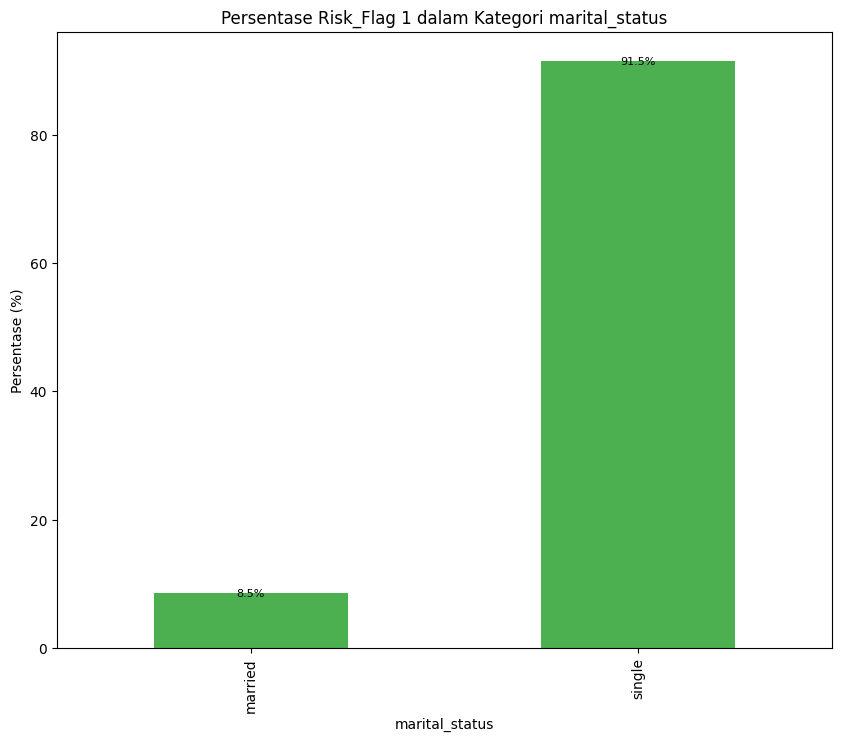

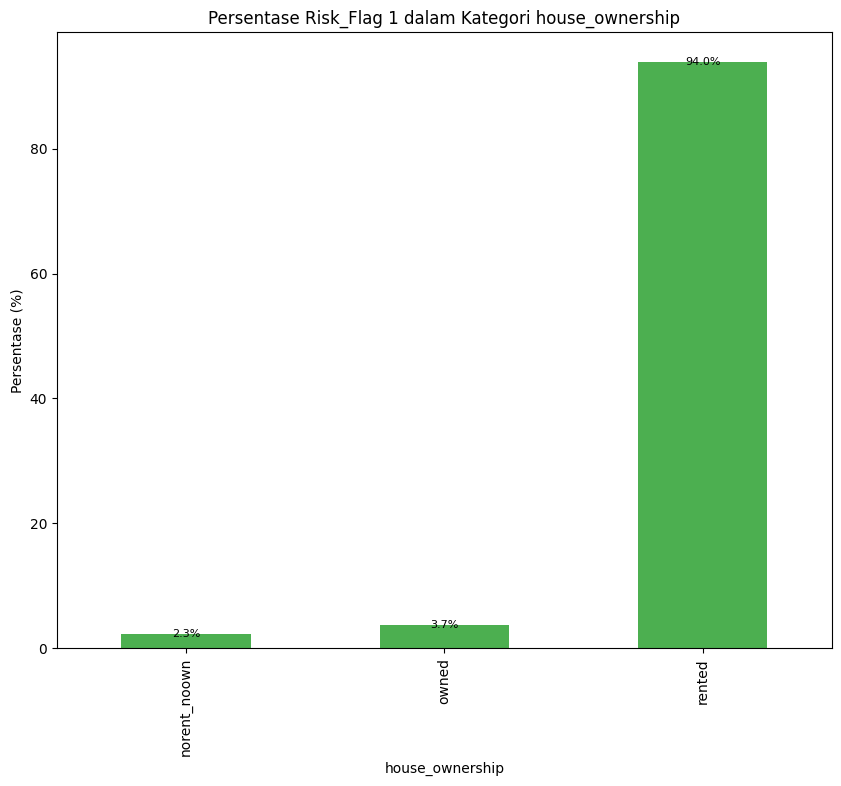

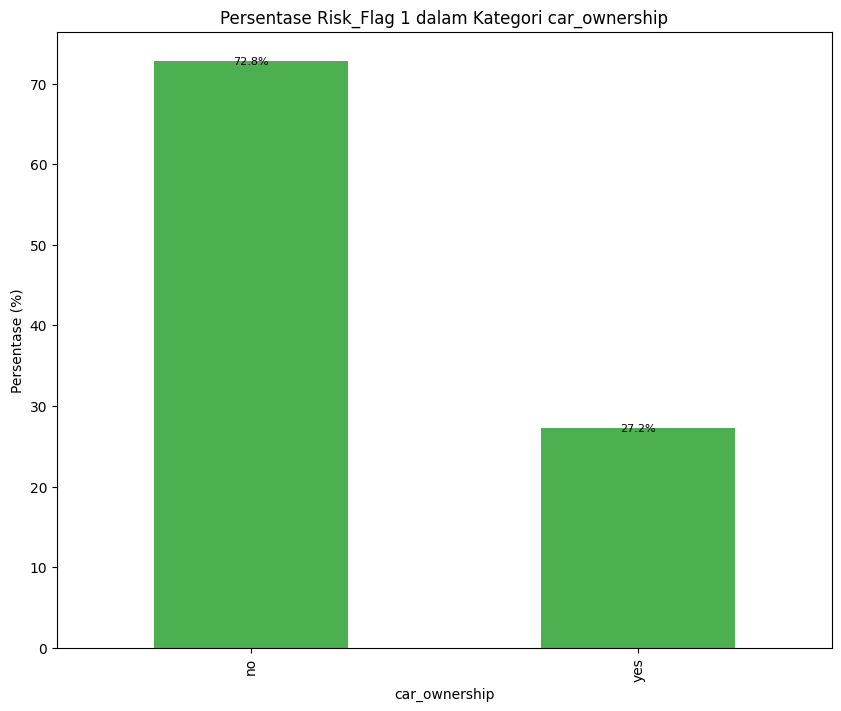

In [36]:


cats = ['marital_status', 'house_ownership', 'car_ownership']

for cat in cats:
    plt.figure(figsize=(10, 8))

    # Menghitung persentase risk flag 1 dalam setiap kategori
    cats_group = df[df['risk_flag'] == 1].groupby(cat).size() / df[df['risk_flag'] == 1].shape[0] * 100

    ax = cats_group.plot(kind='bar', color='#4CAF50')

    plt.title(f'Persentase Risk_Flag 1 dalam Kategori {cat}')
    plt.ylabel('Persentase (%)')

    # Menambahkan label persentase pada plot
    for p in ax.patches:
        height = p.get_height()
        x, y = p.get_xy()
        ax.annotate(f'{height:.1f}%', (x + p.get_width() / 2, y + height),
                    ha='center', va='center', fontsize=8, color='black')

    plt.show()

**Kategori Kolom income**



# **Business Insight and Recomendation**

## **A. Business Insight**




1.   Berdasarkan analisis yang telah dilakukan didapatkan bahwa pengajuan kredit paling banyak pada kategori income middle (3292924 – 6671351 Rupee) tetapi rentang gaji yang mempunyai resiko paling tinggi berada di rentang gaji high dan low.
2.   Apabila dilihat dari rentang usia yang mengajukan kredit terlihat paling banyak di kategori adult (30 – 60 tahun) dan kategori adult mempunyai tingkat resiko yang paling tinggi.
3.  Jika dilihat berdasarkan pengalaman kerja, pengajuan kredit banyak dilakukan pada tingkat senior level dan di level ini resiko kredit juga ditemukan paling banyak.
4.  Jika dilihat dari lamanya bekerja untuk pekerjaan saat ini didominasi dibawah 10 tahun dengan resiko kredit terbesar di rentang 5-10 tahun bekerja di perusahaan tersebut.
5.  Jenis pekerjaan yang banyak mengajuan kredit dan mempunyai resiko kredit paling besar yaitu di kategori profesi engineer tech.
6.  Apabila dilihat dari jenis kategori wilayah, pengajuan kredit banyak dilakukan pada wilayah Rural Area begitupun resiko kreditnya mempunyai resiko yang tinggi di wilayah ini.
7.  Apabila dilihat berdasarkan kategori zona state yang banyak melakukan pengajuan berada pada zona south_zone tetapi tingkat resiko paling tinggi di temukan diwilayah east_zone.

## **B. Recomendation**



1.  Bank dapat melakukan peningkatan pemasaran pada customer dengan level income middle hingga high untuk semua rentang usia tetapi perlu di lihat juga profil dari nasabah tersebut sehingga dapat meminimalkan resiko.
2.   Dilihat berdasarkan pengalaman kerja customer, kategori yang memiliki kapabilibilitas kredit yang baik yaitu dengan pengalaman kerja diatas 5 tahun dengan tingkat lama bekerja untuk pekerjaan saat ini yaitu diatas 5 tahun tetapi perlu di lihat juga profil dari nasabah tersebut sehingga dapat meminimalkan resiko.
3.  Meningkatkan pemasaran pada kategori profesi yang masing rendah.
4.  Meningkatkan pengawasan terhadap resiko kredit untuk customer yang tinggal di Rural area dan di east state.



# **Data Cleansing**

## **A. Handle Missing Value**

In [37]:
df.isnull().sum()

income               0
age                  0
experience           0
marital_status       0
house_ownership      0
car_ownership        0
profession           0
city                 0
state                0
current_job_yrs      0
current_house_yrs    0
risk_flag            0
dtype: int64

Dari informasi di atas, diketahui bahwa tidak ada nilai kosong pada masing-masing kolom.

## **B. Handle Duplicated Data**

In [38]:
df.duplicated().sum()

208810

Terdapat 208.810 data duplikat (setelah mengubah id menjadi index).

## **C. Handle Outliers**

In [39]:
# Menghitung kuartil pertama (Q1) dan kuartil ketiga (Q3) untuk setiap kolom
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)

# Menampilkan hasil
print("Kuartil Pertama (Q1):")
print(q1)

print("\nKuartil Ketiga (Q3):")
print(q3)

Kuartil Pertama (Q1):
income               2503015.0
age                       35.0
experience                 5.0
current_job_yrs            3.0
current_house_yrs         11.0
risk_flag                  0.0
Name: 0.25, dtype: float64

Kuartil Ketiga (Q3):
income               7477502.0
age                       65.0
experience                15.0
current_job_yrs            9.0
current_house_yrs         13.0
risk_flag                  0.0
Name: 0.75, dtype: float64


In [40]:
# Menghitung IQR untuk setiap kolom
iqr = q3 - q1

# Menentukan batas atas dan batas bawah untuk deteksi outliers
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Menampilkan hasil
print("IQR:")
print(iqr)

print("\nBatas Bawah untuk Deteksi Outliers:")
print(lower_bound)

print("\nBatas Atas untuk Deteksi Outliers:")
print(upper_bound)

IQR:
income               4974487.0
age                       30.0
experience                10.0
current_job_yrs            6.0
current_house_yrs          2.0
risk_flag                  0.0
dtype: float64

Batas Bawah untuk Deteksi Outliers:
income              -4958715.5
age                      -10.0
experience               -10.0
current_job_yrs           -6.0
current_house_yrs          8.0
risk_flag                  0.0
dtype: float64

Batas Atas untuk Deteksi Outliers:
income               14939232.5
age                       110.0
experience                 30.0
current_job_yrs            18.0
current_house_yrs          16.0
risk_flag                   0.0
dtype: float64


In [41]:
# Mendeteksi outliers dalam setiap kolom
outliers = ((df < lower_bound) | (df > upper_bound))

# Menampilkan hasil deteksi outliers
print("Deteksi Outliers:")
print(outliers)

Deteksi Outliers:
          age  car_ownership   city  current_house_yrs  current_job_yrs  \
Id                                                                        
1       False          False  False              False            False   
2       False          False  False              False            False   
3       False          False  False              False            False   
4       False          False  False              False            False   
5       False          False  False              False            False   
...       ...            ...    ...                ...              ...   
251996  False          False  False              False            False   
251997  False          False  False              False            False   
251998  False          False  False              False            False   
251999  False          False  False              False            False   
252000  False          False  False              False            False   

      

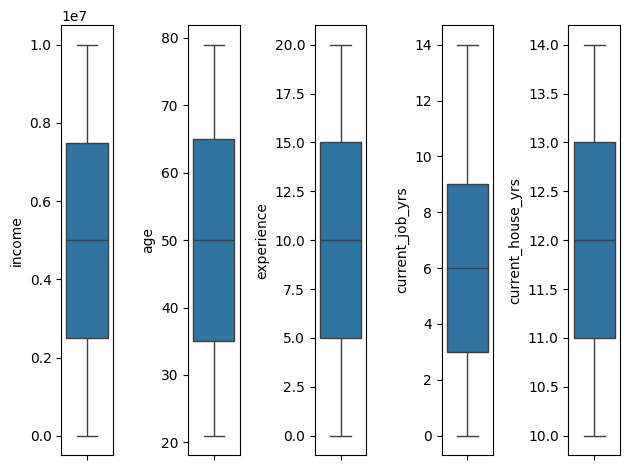

In [42]:
features = kontinu
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=df[features[i]])
    plt.tight_layout()

**Kesimpulan:**

*   Tidak ada outlier.



## **D. Feature Transformation**

Tidak dilakukan feature transformation dikarenakan jumlah data lebih dari 40, sehingga data dianggap telah berdistribusi normal (Teori Limit Pusat)

In [43]:
df

,income,age,experience,marital_status,house_ownership,car_ownership,profession,city,state,current_job_yrs,current_house_yrs,risk_flag
Id,,,,,,,,,,,,
1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya Pradesh,3,13,0
2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli,Tamil Nadu,3,14,1
...,...,...,...,...,...,...,...,...,...,...,...,...
251996,8154883,43,13,single,rented,no,Surgeon,Kolkata,West Bengal,6,11,0
251997,2843572,26,10,single,rented,no,Army_officer,Rewa,Madhya Pradesh,6,11,0
251998,4522448,46,7,single,rented,no,Design_Engineer,Kalyan-Dombivli,Maharashtra,7,12,0


Kesimpulan:

* Setelah dilakukan uji normalitas dengan Shapiro Wilk diketahui bahwa, data pada current_job_yrs dan current_house_yrs tidak terdistribusi normal. Sehingga selanjutnya dilakukan normalisasi.
* Setelah dilakukan normalisasi, grafik distribusi terlihat sama dengan data asli, namun rentangnya lebih sempit. Maka dicoba untuk transformasi.
* Setelah dilakukan transformasi dengan log transformation, grafik distribusi masih sama hanya rentang semakin sempit.
* **Gunakan teori limit pusat**


## **E. Feature Encoding**

In [44]:
#One-Hot Encoding
X = pd.get_dummies(df.drop('risk_flag', axis=1))
y = df['risk_flag']

* Ubah fitur-fitur kategorikal menjadi representasi numerik dengan one-hot encoding. Ini akan membuat kolom tambahan untuk setiap nilai unik dalam fitur kategorikal.
*  Metode Undersampling kebanyakan memerlukan data numerik untuk melakukan operasi pengolahan.

## **F. Handle Class Imbalance**

**Undersampling:**
> Data Sufficient: Jika Anda memiliki dataset yang cukup besar dan data minoritas cukup mewakili variasi dan karakteristiknya, undersampling bisa menjadi pilihan yang baik.

> Ketidakseimbangan yang Ekstrem: Jika ketidakseimbangan kelas sangat ekstrem dan kelas minoritas sangat sedikit, undersampling dapat membantu mengurangi beban komputasi dan waktu pelatihan model.

> Mewakili Kelas Minoritas: Jika data minoritas sudah cukup mewakili variasi dan pola di dalamnya, undersampling dapat menghasilkan hasil yang memadai.

**Oversampling:**
> Informasi Penting di Kelas Minoritas: Jika kelas minoritas mengandung informasi yang penting dan tidak ingin kehilangannya, oversampling dapat membantu menjaga representasi kelas tersebut.

> Memperbesar Jumlah Sampel: Jika kelas minoritas memiliki jumlah sampel yang sangat sedikit dan ingin memperbesar dataset, oversampling dapat membantu menghindari kekurangan data.

**SMOTE (Synthetic Minority Over-sampling Technique):**
> Dataset Terbatas: Jika Anda memiliki dataset yang relatif kecil dan ingin meningkatkan jumlah sampel kelas minoritas tanpa menghilangkan data asli, SMOTE dapat menjadi pilihan.

> Mengatasi Kekurangan Data: Jika kelas minoritas tidak terwakili dengan baik dan Anda ingin menghasilkan sampel sintetis untuk mengatasi kekurangan data.

> Menjaga Kekhasan Data: Jika data minoritas memiliki variasi atau pola yang unik, SMOTE dapat membantu mempertahankan kekhasan data tersebut.

**Kesimpulan:**

*   Undersampling berhasil mensintesis sampel-sampel baru untuk kelas mayoritas sehingga mencapai keseimbangan antara kedua kelas.
*   Dataset yang sudah di-resample ini dapat digunakan untuk melatih model machine learning dengan harapan bahwa model akan lebih baik dalam menangani kelas minoritas yang tidak seimbang.



In [45]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize RandomUnderSampler
undersampler = RandomUnderSampler(sampling_strategy='majority', random_state=42)

# Perform oversampling and undersampling on the training data
X_resampled, y_resampled = undersampler.fit_resample(X_train, y_train)

# Display the class distribution before and after handling imbalance
print("Class distribution before handling imbalance:")
print(y_train.value_counts())

# Menampilkan distribusi kelas setelah menggunakan Undersampling
print("\nClass distribution after handling imbalance dengan Undersampling:")
print(pd.Series(y_resampled).value_counts())

Class distribution before handling imbalance:
0    176857
1     24743
Name: risk_flag, dtype: int64

Class distribution after handling imbalance dengan Undersampling:
0    24743
1    24743
Name: risk_flag, dtype: int64


## **G. Mencari Korelasi antar Fitur Numerical**

In [46]:
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
corr = corr.mask(mask)

fig = go.Figure()
fig.add_trace(go.Heatmap(z = corr, x = corr.columns.tolist(),y = corr.columns.tolist(),colorscale = 'RdBu',xgap = 1,ygap = 1,hoverinfo = "none")
)

fig.update_layout(
    {
        "title": {"text": "<b>Correlation in numerical feautures</b>","x": 0.5,"y": 0.9,"font": {"size": 15}
        },
        "xaxis": {"title": "Columns","tickfont": {"size": 8}
        },
        "yaxis": {"title": "Columns","tickfont": {"size": 8}
        },
        "template":'plotly_white',
        "yaxis_autorange" : "reversed"
    }
)
fig.show()

Terlihat dari korelasi heatmap diatas terlihat bahwa current_job_years dan experience mempunyai korelasi yang besar untuk itu kita akan memilih salah satu saja sebagai fitur dari target agar tidak terjadi Multikolinearitas.

**Tambahkan uji asumsi multicol**

# **Feature Engineering**

## **A. Feature Selection**

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 252000 entries, 1 to 252000
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   income             252000 non-null  int64 
 1   age                252000 non-null  int64 
 2   experience         252000 non-null  int64 
 3   marital_status     252000 non-null  object
 4   house_ownership    252000 non-null  object
 5   car_ownership      252000 non-null  object
 6   profession         252000 non-null  object
 7   city               252000 non-null  object
 8   state              252000 non-null  object
 9   current_job_yrs    252000 non-null  int64 
 10  current_house_yrs  252000 non-null  int64 
 11  risk_flag          252000 non-null  int64 
dtypes: int64(6), object(6)
memory usage: 25.0+ MB


In [48]:
correlation_matrix = df.corr()
correlation_matrix

,income,age,experience,current_job_yrs,current_house_yrs,risk_flag
income,1.000000,-0.000652,0.006422,0.007045,-0.002397,-0.003091
age,-0.000652,1.000000,-0.001118,0.002154,-0.020134,-0.021809
experience,0.006422,-0.001118,1.000000,0.646098,0.019309,-0.034523
current_job_yrs,0.007045,0.002154,0.646098,1.000000,0.005372,-0.016942
current_house_yrs,-0.002397,-0.020134,0.019309,0.005372,1.000000,-0.004375
risk_flag,-0.003091,-0.021809,-0.034523,-0.016942,-0.004375,1.000000


In [50]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = df[['income','age', 'experience','current_job_yrs', 'current_house_yrs']]
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

vif_data

,Variable,VIF
0,income,3.879021
1,age,8.556036
2,experience,6.541820
3,current_job_yrs,6.830915
4,current_house_yrs,13.281953


Dalam dataset terdapat beberapa fitur yang berkorelasi tinggi yaitu current_house_yrs hal ini diindikasikan terjadi multikoleniaritas, maka fitur ini tidak akan dimasukkan kedalam fitur selection

## **B. Feature Extraction**

### **Feature Tambahan**

## **Pengelompokan Kategori Data Numerik**

**Kategori income**

In [51]:


# Menghitung kuartil
quartiles = df['income'].quantile([0, 0.33, 0.67, 1])

# Membuat fungsi untuk mengkategori income
def categorize_income(income):
    if income <= quartiles[0.33]:
        return 'low'
    elif income <= quartiles[0.67]:
        return 'middle'
    else:
        return 'high'

# Menerapkan fungsi ke kolom baru 'Income_Category'
df['income_category'] = df['income'].apply(categorize_income)

**Kategori Kolom age**



In [52]:

def classify_age(age):
    if age < 30:
        return 'young'
    elif age < 60:
        return 'adult'
    else:
        return 'elder'


# Menerapkan fungsi ke kolom baru 'Age_Category'
df['age_category'] = df['age'].apply(classify_age)

[referensi](https://www.neliti.com/id/publications/249455/klasifikasi-kelompok-umur-manusia-berdasarkan-analisis-dimensifraktal-box-counti)

**Kategori Kolom experience**



In [53]:
# Membuat fungsi untuk mengkategori experience
def categorize_experience(experience):
    if experience <= 2:
        return 'entry level'
    elif experience <= 5:
        return 'mid level'
    else:
        return 'senior level'

# Menerapkan fungsi ke kolom baru 'Experience_Category'
df['experience_category'] = df['experience'].apply(categorize_experience)

[referensi](https://revou.co/panduan-karir/jenjang-karir-data-analyst)

In [54]:
df.head()

,income,age,experience,marital_status,house_ownership,car_ownership,profession,city,state,current_job_yrs,current_house_yrs,risk_flag,income_category,age_category,experience_category
Id,,,,,,,,,,,,,,,
1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya Pradesh,3,13,0,low,young,mid level
2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0,high,adult,senior level
3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0,middle,elder,mid level
4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1,middle,adult,entry level
5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli,Tamil Nadu,3,14,1,middle,adult,senior level


In [55]:
kontinu_group = ['income_category', 'age_category', 'experience_category']

**Pengelompokkan Data Categorical**

In [56]:
#Data professions
profession_group = {
    'engineer tech': ['Computer_hardware_engineer', 'Industrial_Engineer', 'Mechanical_engineer', 'Chemical_engineer',
                        'Biomedical_Engineer', 'Software_Developer', 'Petroleum_Engineer', 'Civil_engineer',
                        'Design_Engineer', 'Engineer','Technician', 'Technology_specialist', 'Computer_operator','Technical_writer'],
    'design art': ['Web_designer', 'Fashion_Designer', 'Graphic_Designer', 'Artist', 'Designer','Comedian','Chef'],
    'health': ['Dentist', 'Surgeon', 'Microbiologist', 'Nurse','Psychologist','Physician'],
    'consultant': ['Financial_Analyst', 'Consultant', 'Chartered_Accountant','Lawyer', 'Economist','Surveyor', 'Analyst',
                    'Architect','Statistician', 'Scientist', 'Geologist'],
    'office management': ['Magistrate', 'Secretary', 'Official', 'Hotel_Manager','Drafter','Librarian'],
    'aviation': ['Flight_attendant', 'Aviator','Air_traffic_controller'],
    'gov': ['Police_officer','Politician','Army_officer', 'Firefighter', 'Civil_servant']
}

In [57]:
df['profession_group'] = df['profession'].apply(lambda x: next((key for key, value in profession_group.items() if x in value), 'other'))

In [58]:
def city_group(city):
    if city in ['Delhi city', 'Mumbai', 'Kolkata', 'Chennai', 'Bangalore']:
        return 'Metro'
    elif city in ['Ahmedabad', 'Hyderabad', 'Pune', 'Surat', 'Jaipur', 'Lucknow', 'Kanpur', 'Nagpur', 'Visakhapatnam', 'Indore', 'Thane',
                  'Bhopal', 'Pimpri-Chinchwad', 'Patna', 'Vadodara', 'Ghaziabad', 'Ludhiana', 'Agra', 'Nashik', 'Faridabad', 'Meerut', 'Rajkot',
                  'Varanasi', 'Srinagar', 'Amritsar', 'Allahabad', 'Jabalpur', 'Gwalior', 'Vijayawada', 'Jodhpur', 'Raipur', 'Kota', 'Guwahati', 'Chandigarh city']:
        return 'Urban'
    elif city in ['Navi Mumbai', 'Kalyan-Dombivli', 'Vasai-Virar', 'Mira-Bhayandar', 'Thiruvananthapuram', 'Bhiwandi', 'Noida', 'Bhopal', 'Howrah',
                  'Saharanpur', 'Berhampur', 'Suryapet', 'Muzaffarpur', 'Nadiad', 'Siliguri', 'Bhavnagar', 'Kurnool', 'Tenali', 'Satna', 'Nandyal',
                  'Etawah', 'Morena', 'Ballia', 'Machilipatnam', 'Mau', 'Machilipatnam', 'Bhagalpur', 'Siwan', 'Meerut', 'Dibrugarh', 'Gaya', 'Darbhanga',
                  'Hajipur', 'Mirzapur', 'Akola', 'Satna', 'Motihari', 'Jalna', 'Ramgarh', 'Ozhukarai', 'Saharsa', 'Munger', 'Farrukhabad', 'Nangloi Jat',
                  'Thoothukudi', 'Nagercoil', 'Rourkela', 'Jhansi', 'Sultan Pur Majra']:
        return 'Suburban'
    else:
        return 'Rural'

In [59]:
df['city_group'] = df['city'].apply(city_group)

In [60]:
state_group = {
    'north_zone': ['Uttar Pradesh', 'Haryana', 'Jammu and Kashmir', 'Punjab', 'Uttarakhand', 'Chandigarh', 'Delhi', 'Himachal Pradesh'],
    'east_zone': ['Bihar', 'Jharkhand', 'Odisha', 'West Bengal', 'Assam', 'Sikkim', 'Tripura', 'Mizoram', 'Manipur'],
    'south_zone': ['Andhra Pradesh', 'Tamil Nadu', 'Karnataka', 'Telangana', 'Kerala', 'Puducherry'],
    'west_zone': ['Maharashtra', 'Gujarat', 'Rajasthan', 'Chhattisgarh', 'Madhya Pradesh'],
}

In [61]:
df['state_group'] = df['state'].apply(lambda x: next((key for key, value in state_group.items() if x in value), 'Other'))

In [62]:
df.head()

,income,age,experience,marital_status,house_ownership,car_ownership,profession,city,state,current_job_yrs,current_house_yrs,risk_flag,income_category,age_category,experience_category,profession_group,city_group,state_group
Id,,,,,,,,,,,,,,,,,,
1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya Pradesh,3,13,0,low,young,mid level,engineer tech,Rural,west_zone
2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0,high,adult,senior level,engineer tech,Rural,west_zone
3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0,middle,elder,mid level,engineer tech,Rural,south_zone
4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1,middle,adult,entry level,engineer tech,Rural,east_zone
5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli,Tamil Nadu,3,14,1,middle,adult,senior level,gov,Rural,south_zone


In [63]:
diskrit_group = ['profession_group', 'city_group', 'state_group']

1. Pada kolom profession_group nilai yang mendominasi adalah engineer tech.
2. Pada kolom city_group nilai yang mendominasi adalah Rural.
3. Pada kolom state_group nilai yang mendominasi adalah south_zone.


Menambahkan fitur baru Income_per_experience untuk melihat income yang diterima customer dibagi jumlah pengalaman dari customer tersebut

In [65]:
df['income_per_experience'] = round(df['income'] / df['experience'],2)
df.tail(10)

,income,age,experience,marital_status,house_ownership,car_ownership,profession,city,state,current_job_yrs,current_house_yrs,risk_flag,income_category,age_category,experience_category,profession_group,city_group,state_group,income_per_experience
Id,,,,,,,,,,,,,,,,,,,
251991,349066,68,4,single,rented,no,Technical_writer,Madhyamgram,West Bengal,4,11,0,low,elder,mid level,engineer tech,Rural,east_zone,87266.50
251992,6828311,36,11,single,owned,no,Designer,Nagpur,Maharashtra,11,13,0,high,adult,senior level,design art,Urban,west_zone,620755.55
251993,7551745,57,7,married,rented,no,Secretary,Nadiad,Gujarat,4,12,0,high,adult,senior level,office management,Suburban,west_zone,1078820.71
251994,8141027,60,10,single,rented,no,Secretary,Bhusawal,Maharashtra,9,13,1,high,elder,senior level,office management,Rural,west_zone,814102.70
251995,7215678,27,8,single,rented,no,Aviator,Satna,Madhya Pradesh,8,10,0,high,young,senior level,aviation,Suburban,west_zone,901959.75
251996,8154883,43,13,single,rented,no,Surgeon,Kolkata,West Bengal,6,11,0,high,adult,senior level,health,Metro,east_zone,627298.69
251997,2843572,26,10,single,rented,no,Army_officer,Rewa,Madhya Pradesh,6,11,0,low,young,senior level,gov,Rural,west_zone,284357.20
251998,4522448,46,7,single,rented,no,Design_Engineer,Kalyan-Dombivli,Maharashtra,7,12,0,middle,adult,senior level,engineer tech,Suburban,west_zone,646064.00
251999,6507128,45,0,single,rented,no,Graphic_Designer,Pondicherry,Puducherry,0,10,0,middle,adult,entry level,design art,Rural,south_zone,inf


membuat fitur capital_ownership dengan menggabungkan fitur house_ownership dan car_ownership untuk melihat harta kepemilikan customer

In [66]:
def ownership_category(row):
    if row['house_ownership'] == 'owned' and row['car_ownership'] == 'yes':
        return 1
    elif row['house_ownership'] == 'owned' and row['car_ownership'] == 'no':
        return 2
    elif row['house_ownership'] == 'rented' and row['car_ownership'] == 'yes':
        return 3
    elif row['house_ownership'] == 'rented' and row['car_ownership'] == 'no':
        return 4
    elif row['house_ownership'] == 'norent_noown' and row['car_ownership'] == 'yes':
        return 4
    else:
        return 0

df['capital_ownership'] = df.apply(ownership_category, axis=1)
df.head()

,income,age,experience,marital_status,house_ownership,car_ownership,profession,city,state,current_job_yrs,current_house_yrs,risk_flag,income_category,age_category,experience_category,profession_group,city_group,state_group,income_per_experience,capital_ownership
Id,,,,,,,,,,,,,,,,,,,,
1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya Pradesh,3,13,0,low,young,mid level,engineer tech,Rural,west_zone,434611.33,4
2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0,high,adult,senior level,engineer tech,Rural,west_zone,757451.60,4
3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0,middle,elder,mid level,engineer tech,Rural,south_zone,997953.75,4
4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1,middle,adult,entry level,engineer tech,Rural,east_zone,3128225.50,3
5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli,Tamil Nadu,3,14,1,middle,adult,senior level,gov,Rural,south_zone,524442.82,4


In [67]:
df.columns

Index(['income', 'age', 'experience', 'marital_status', 'house_ownership',
       'car_ownership', 'profession', 'city', 'state', 'current_job_yrs',
       'current_house_yrs', 'risk_flag', 'income_category', 'age_category',
       'experience_category', 'profession_group', 'city_group', 'state_group',
       'income_per_experience', 'capital_ownership'],
      dtype='object')

In [69]:
df_selection = df[['marital_status', 'current_job_yrs', 'income_category', 'age_category', 'experience_category',
       'profession_group', 'city_group', 'state_group',
       'income_per_experience', 'capital_ownership', 'risk_flag']]

df_selection.head()

,marital_status,current_job_yrs,income_category,age_category,experience_category,profession_group,city_group,state_group,income_per_experience,capital_ownership,risk_flag
Id,,,,,,,,,,,
1,single,3,low,young,mid level,engineer tech,Rural,west_zone,434611.33,4,0
2,single,9,high,adult,senior level,engineer tech,Rural,west_zone,757451.60,4,0
3,married,4,middle,elder,mid level,engineer tech,Rural,south_zone,997953.75,4,0
4,single,2,middle,adult,entry level,engineer tech,Rural,east_zone,3128225.50,3,1
5,single,3,middle,adult,senior level,gov,Rural,south_zone,524442.82,4,1


**Label Encoding Untuk kategori fitur yang bertingkat**



In [70]:
df_encoding = df_selection.copy()
# Label Encoding
fitur_label = ['income_category','marital_status','experiece_category', 'age_category']

# Inisialisasi label encoder
label_encoder = LabelEncoder()

# Fitur yang akan di-label encoding
fitur_label = ['income_category', 'marital_status', 'experience_category', 'age_category']

# Lakukan label encoding untuk setiap fitur
for fitur in fitur_label:
    df_encoding[fitur] = label_encoder.fit_transform(df_encoding[fitur])

# Tampilkan hasil label encoding
df_encoding.head()


,marital_status,current_job_yrs,income_category,age_category,experience_category,profession_group,city_group,state_group,income_per_experience,capital_ownership,risk_flag
Id,,,,,,,,,,,
1,1,3,1,2,1,engineer tech,Rural,west_zone,434611.33,4,0
2,1,9,0,0,2,engineer tech,Rural,west_zone,757451.60,4,0
3,0,4,2,1,1,engineer tech,Rural,south_zone,997953.75,4,0
4,1,2,2,0,0,engineer tech,Rural,east_zone,3128225.50,3,1
5,1,3,2,0,2,gov,Rural,south_zone,524442.82,4,1


**One Hot Encoding untuk data kategori ordinal**

In [71]:
onehot_label = ['profession_group','city_group','state_group']

#Lakukan one-hot encoding
df_encoding = pd.get_dummies(df_encoding, columns=onehot_label, drop_first=True)

#Tampilkan hasil one-hot encoding
df_encoding

,marital_status,current_job_yrs,income_category,age_category,experience_category,income_per_experience,capital_ownership,risk_flag,profession_group_consultant,profession_group_design art,profession_group_engineer tech,profession_group_gov,profession_group_health,profession_group_office management,city_group_Rural,city_group_Suburban,city_group_Urban,state_group_north_zone,state_group_south_zone,state_group_west_zone
Id,,,,,,,,,,,,,,,,,,,,
1,1,3,1,2,1,434611.33,4,0,0,0,1,0,0,0,1,0,0,0,0,1
2,1,9,0,0,2,757451.60,4,0,0,0,1,0,0,0,1,0,0,0,0,1
3,0,4,2,1,1,997953.75,4,0,0,0,1,0,0,0,1,0,0,0,1,0
4,1,2,2,0,0,3128225.50,3,1,0,0,1,0,0,0,1,0,0,0,0,0
5,1,3,2,0,2,524442.82,4,1,0,0,0,1,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251996,1,6,0,0,2,627298.69,4,0,0,0,0,0,1,0,0,0,0,0,0,0
251997,1,6,1,2,2,284357.20,4,0,0,0,0,1,0,0,1,0,0,0,0,1
251998,1,7,2,0,2,646064.00,4,0,0,0,1,0,0,0,0,1,0,0,0,1


## C. Fitur Tambahan

1. Credit Score <br>
    Menambahkan nilai kredit rata-rata dari semua kredit yang dimiliki oleh seseorang dapat memberikan gambaran tentang seberapa baik seorang individu dalam mengelola kredit mereka
2. Jumlah Credit Aktif <br>
    Fitur ini dapat mencatat berapa banyak kredit aktif yang dimiliki oleh seseorang pada saat yang bersamaan, seperti kartu kredit, pinjaman pribadi, dll.
3. Loan Amount <br>
    Fitur ini dapat memberikan informasi tentang jumlah pinjaman yang dimiliki oleh individu dan dapat menjadi faktor penting dalam memprediksi risiko default pada dataset yang terkait dengan pinjaman.
4. Loan Purpose <br>
    fitur ini untuk memberikan informasi tujuan dari pinjaman tersebut.